In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
train=pd.read_csv("train_wn75k28.csv")

In [3]:
train.products_purchased.fillna(train.products_purchased.median(),inplace=True)


In [4]:
train.signup_date=pd.to_datetime(train.signup_date)
train.signup_date=train.signup_date.map(dt.datetime.toordinal)

In [5]:
train.created_at=pd.to_datetime(train.created_at)
train.created_at=train.created_at.map(dt.datetime.toordinal)

<AxesSubplot:>

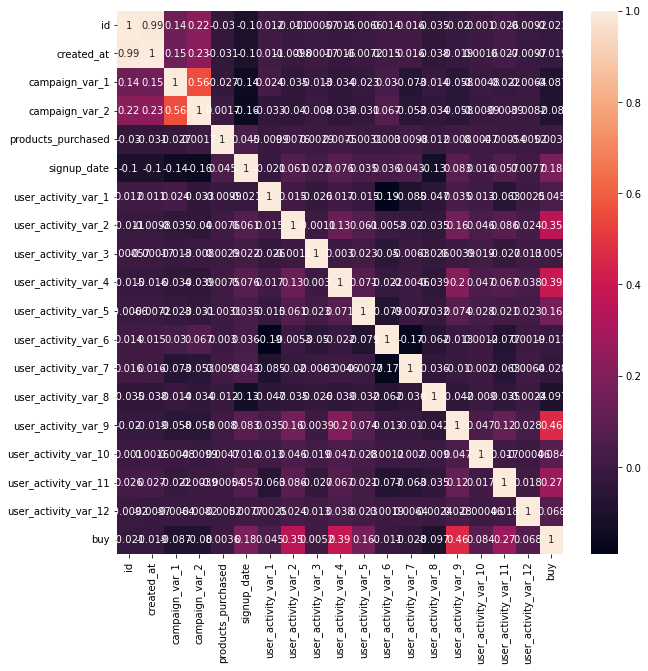

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

In [7]:
train.buy.value_counts()

0    37163
1     1998
Name: buy, dtype: int64

In [8]:
train_0=train[train.buy==0]

In [9]:
train_0.buy.value_counts()

0    37163
Name: buy, dtype: int64

In [10]:
train_1=train[train.buy==1]

In [11]:
train_1.buy.value_counts()

1    1998
Name: buy, dtype: int64

In [12]:
train_s=train_0.sample(n=1998)

In [13]:
f_train=pd.concat([train_s,train_1])

In [14]:
f_train.buy.value_counts()

0    1998
1    1998
Name: buy, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [16]:
x=f_train.drop(["buy"],axis=1)

In [17]:
y=f_train.buy

In [18]:
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=i)
    model=RandomForestClassifier(n_estimators=1000,max_depth=1000,min_samples_split=2,max_samples=5)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    score=metrics.mean_squared_error(y_test,pred)
    print(score,i)

0.20125 1
0.2175 2
0.18625 3
0.17875 4
0.19875 5
0.17375 6
0.18875 7
0.18375 8
0.22 9
0.17875 10
0.18375 11
0.1825 12
0.19 13
0.18625 14
0.19875 15
0.2025 16
0.17625 17
0.1725 18
0.22125 19
0.20875 20
0.19875 21
0.1875 22
0.1775 23
0.2325 24
0.1775 25
0.155 26
0.19875 27
0.1975 28
0.2025 29
0.195 30
0.19375 31
0.215 32
0.21625 33
0.185 34
0.20375 35
0.20625 36
0.185 37
0.21125 38
0.21875 39
0.1775 40
0.17375 41
0.1925 42
0.17875 43
0.18625 44
0.18 45
0.1875 46
0.19375 47
0.25875 48
0.20125 49
0.19 50
0.1875 51
0.19875 52
0.1875 53
0.1975 54
0.17 55
0.20375 56
0.165 57
0.1725 58
0.2225 59
0.2075 60
0.1625 61
0.18625 62
0.1975 63
0.1975 64
0.20625 65
0.1975 66
0.19125 67
0.18 68
0.1875 69
0.21125 70
0.19125 71
0.22 72
0.18875 73
0.1825 74
0.1925 75
0.21625 76
0.16 77
0.1825 78
0.1725 79
0.175 80
0.2075 81
0.2175 82
0.21375 83
0.17125 84
0.21 85
0.19625 86
0.2125 87
0.1825 88
0.21875 89
0.19375 90
0.2125 91
0.1675 92
0.21625 93
0.18875 94
0.17125 95
0.18875 96
0.1925 97
0.18125 98
0.20375

In [19]:
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=i)
    model=RandomForestClassifier(n_estimators=1000,max_depth=1000,min_samples_split=2,max_samples=5)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    score=metrics.r2_score(y_test,pred)
    print(score,i)

0.16000000000000003 1
0.25 2
0.14 3
0.21499999999999997 4
0.255 5
0.25 6
0.27 7
0.22999999999999998 8
0.16000000000000003 9
0.30500000000000005 10
0.21999999999999997 11
0.30500000000000005 12
0.19999999999999996 13
0.13 14
0.245 15
0.21499999999999997 16
0.32499999999999996 17
0.25 18
0.19999999999999996 19
0.31499999999999995 20
0.15000000000000002 21
0.265 22
0.28500000000000003 23
0.07499999999999996 24
0.27 25
0.275 26
0.18000000000000005 27
0.135 28
0.28500000000000003 29
0.28 30
0.16500000000000004 31
0.255 32
0.22999999999999998 33
0.13 34
0.18999999999999995 35
0.20999999999999996 36
0.255 37
0.245 38
0.10999999999999999 39
0.37 40
0.19499999999999995 41
0.30000000000000004 42
0.16500000000000004 43
0.29500000000000004 44
0.22499999999999998 45
0.235 46
0.31000000000000005 47
0.04500000000000004 48
0.235 49
0.16500000000000004 50
0.235 51
0.255 52
0.17500000000000004 53
0.29000000000000004 54
0.26 55
0.31000000000000005 56
0.24 57
0.33499999999999996 58
0.19499999999999995 59


In [20]:
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=i)
    model=RandomForestClassifier(n_estimators=1000,max_depth=1000,min_samples_split=2,max_samples=5)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    score=metrics.accuracy_score(y_test,pred)
    print(score,i)

0.79375 1
0.79875 2
0.825 3
0.79125 4
0.79 5
0.79625 6
0.81875 7
0.815 8
0.785 9
0.81125 10
0.8125 11
0.805 12
0.815 13
0.8175 14
0.7925 15
0.79875 16
0.8275 17
0.815 18
0.79125 19
0.82625 20
0.8025 21
0.81375 22
0.81625 23
0.81375 24
0.8075 25
0.76 26
0.81625 27
0.83 28
0.83375 29
0.8425 30
0.78875 31
0.8025 32
0.7875 33
0.7825 34
0.8075 35
0.79375 36
0.81375 37
0.80375 38
0.7825 39
0.835 40
0.81625 41
0.81125 42
0.80375 43
0.81125 44
0.80375 45
0.82375 46
0.82875 47
0.77625 48
0.81375 49
0.79125 50
0.80875 51
0.79375 52
0.805 53
0.81375 54
0.81875 55
0.77875 56
0.8175 57
0.8375 58
0.80375 59
0.81625 60
0.79625 61
0.8 62
0.8125 63
0.81 64
0.79875 65
0.79875 66
0.81625 67
0.80625 68
0.7825 69
0.8025 70
0.7975 71
0.7875 72
0.80375 73
0.82375 74
0.80375 75
0.79375 76
0.81875 77
0.81875 78
0.84625 79
0.80375 80
0.77625 81
0.77625 82
0.81 83
0.82875 84
0.80625 85
0.81875 86
0.77875 87
0.815 88
0.80625 89
0.79375 90
0.76625 91
0.815 92
0.80375 93
0.775 94
0.83625 95
0.82875 96
0.815 97
0.81

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=95)
model=RandomForestClassifier(n_estimators=1000,max_depth=1000,min_samples_split=2,max_samples=5)
model.fit(x_train,y_train)
pred=model.predict(x_test)
score=metrics.accuracy_score(y_test,pred)
print(score)

0.8325


In [24]:
pred2=model.predict(x_train)

In [25]:
metrics.accuracy_score(y_train,pred2)

0.8144555694618273

In [26]:
test=pd.read_csv("test_Wf7sxXF.csv")

In [27]:
test.products_purchased.fillna(test.products_purchased.median(),inplace=True)

In [28]:
test.signup_date=pd.to_datetime(test.signup_date)
test.signup_date=test.signup_date.map(dt.datetime.toordinal)

In [29]:
test.created_at=pd.to_datetime(test.created_at)
test.created_at=test.created_at.map(dt.datetime.toordinal)

In [30]:
pred_r=model.predict(test)

In [31]:
test["pred"]=pred_r

In [32]:
test.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,pred
0,39162,738156,2,2,2.0,738019,1,1,0,0,0,1,0,0,0,0,1,0,1
1,39163,738156,4,7,3.0,737566,1,0,0,0,0,0,0,1,0,0,0,0,0
2,39164,738156,8,7,2.0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
3,39165,738156,9,8,2.0,737598,0,0,0,0,1,1,1,0,0,0,2,0,1
4,39166,738156,4,5,2.0,737859,1,0,0,0,0,0,0,0,0,0,0,0,1


In [33]:
test.pred.value_counts()

0    11391
1     1793
Name: pred, dtype: int64

In [34]:
test.to_csv("random_f_c83.csv",header=True,index=False)